# Linear Regression

## 1. Data Understanding/Data Cleansing

In [3]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

#Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Loading the loan dataset
df_bike = pd.read_csv('day.csv')
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df_bike.shape

(730, 16)

In [6]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
column_names_list = df_bike.columns.tolist()
print(column_names_list)

['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


Columns of day.csv:

    - instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### 1.1 Data understanding and removing unnecessary columns for analysis

In [10]:
# cnt column is the sum of casual and registered and as cnt is the target we can remove these 2 other columns.
df_bike.drop(['casual','registered'],axis=1,inplace=True)
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
# Instant is the index column and dteday data of year and month are already available in other columns so these 2 can also be dropped.
df_bike.drop(['instant','dteday'],axis=1,inplace=True)
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
#Checking for null values
df_bike.isnull().sum().sort_values(ascending=False)

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [13]:
#Checking for duplicate values
df_bike.duplicated().sum()

0

#### There are no null values and no duplicate rows in the data set.

### 1.2 Changing ordinal data to categorical data

In [16]:
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
#From the above head value and the data dictonary we can observe which are the columns that need to be changed to categorical data.
df_bike.mnth = df_bike.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
#Took a value of dteDay and found out which integer corresponds to sunday,monday,etc.
df_bike.weekday = df_bike.weekday.map({0:"Tuesday",1:"Wednesday",2:"Thrusday",3:"Friday",4:"Saturday",5:"Sunday",6:"Monday"})
#Season values are given in data dictonary
df_bike.season = df_bike.season.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
df_bike.weathersit = df_bike.weathersit.map({1:'Clear',2:'Misty',3:'Light Snow with Rain',4:'Heavy Snow with Rain'})

df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,jan,0,Monday,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,jan,0,Tuesday,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,jan,0,Thrusday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## 2. Data Analysis and Visualisation

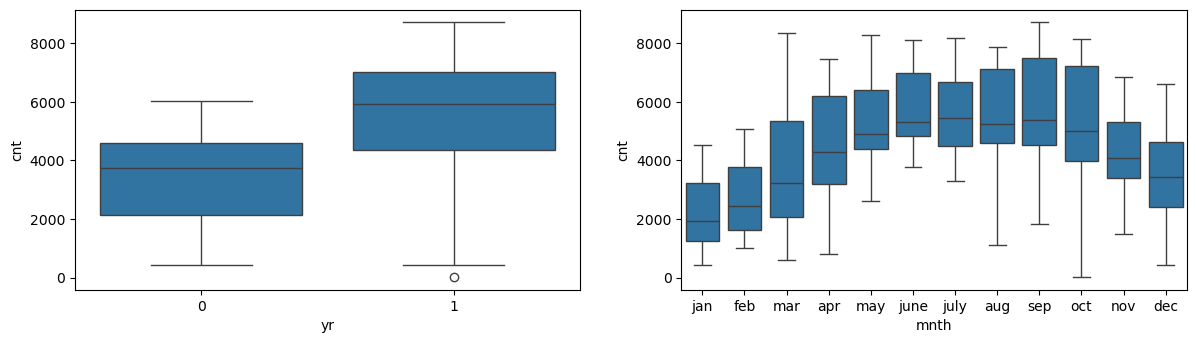

In [19]:
#We can differentiate the variables/columns to two types: continuous numerical and categorical
#Categorical variables are: ['yr', 'season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
#let's take yr and mnth.
plt.figure(figsize=(30, 8))
plt.subplot(2,4,1)
sns.boxplot(x = 'yr', y = 'cnt', data = df_bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_bike)
plt.show()

#### There was increase in bike rental as it went from 2018 to 2019. So there is a possibility that it will increase as we go further. And the demand for bike renatal is high starting from may and almost until october.

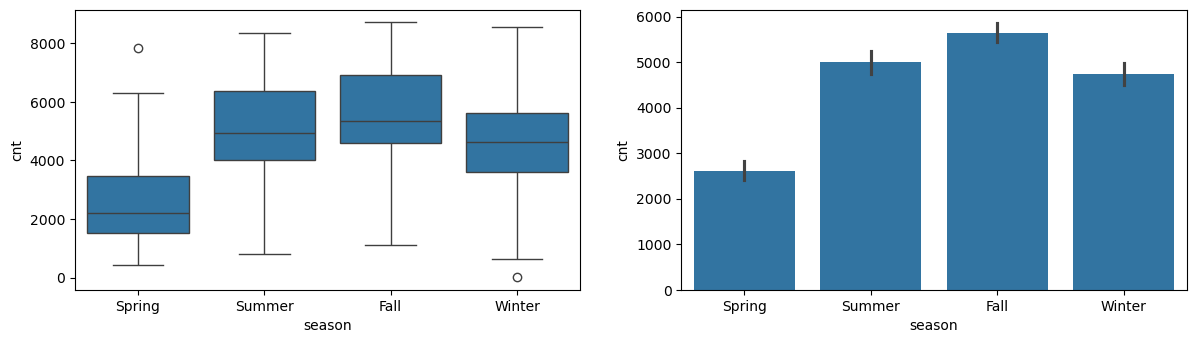

In [21]:
#Now let's compare with season.
plt.figure(figsize=(30, 8))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_bike)
plt.subplot(2,4,2)
sns.barplot(x = 'season', y = 'cnt', data = df_bike)
plt.show()

#### During summer and fall seasons the rentals of bikes are high.

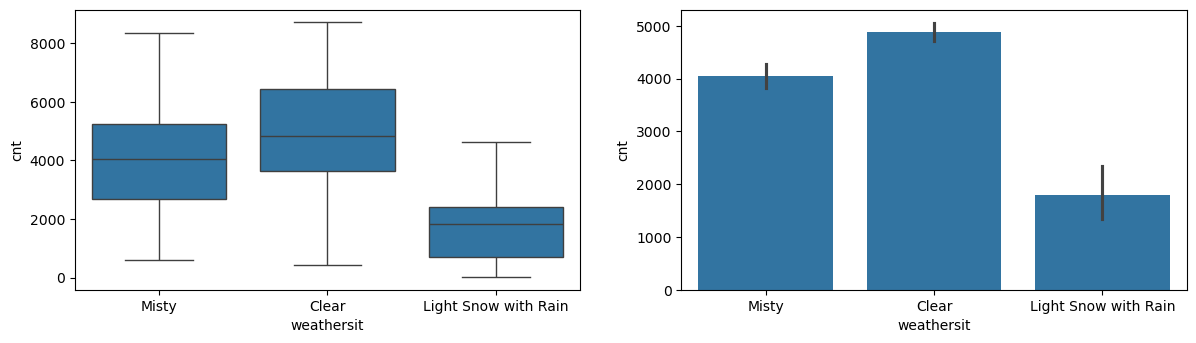

In [23]:
#Let's take weathersit
plt.figure(figsize=(30, 8))
plt.subplot(2,4,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_bike)
plt.subplot(2,4,2)
sns.barplot(x = 'weathersit', y = 'cnt', data = df_bike)
plt.show()

#### People might be mostly avoiding to go out during rain as we abserve huge decline in bike rental during rain.

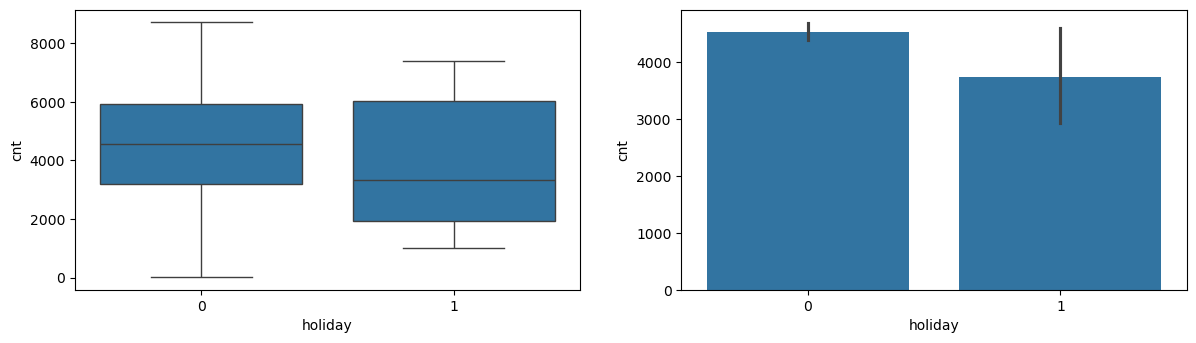

In [25]:
#Let's take holiday
plt.figure(figsize=(30, 8))
plt.subplot(2,4,1)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_bike)
plt.subplot(2,4,2)
sns.barplot(x = 'holiday', y = 'cnt', data = df_bike)
plt.show()

#### From the plots we can observe that people go out on non-holiday days (0), as on holidays mostly they will prefer to stay home.

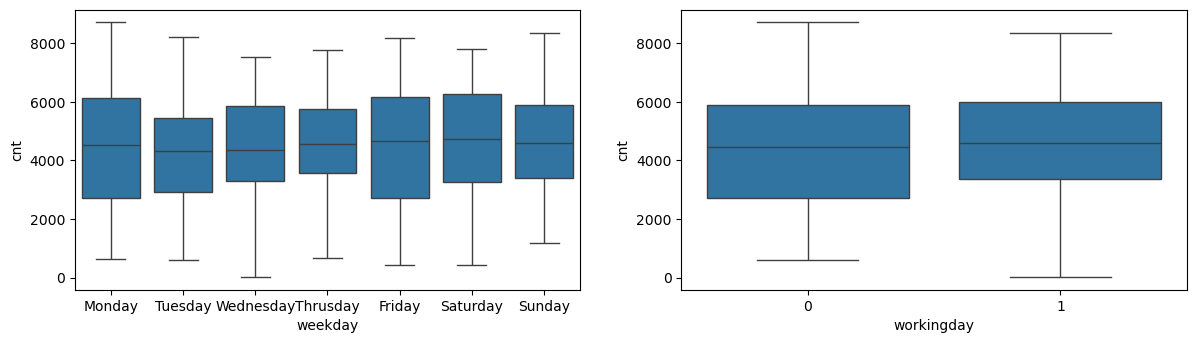

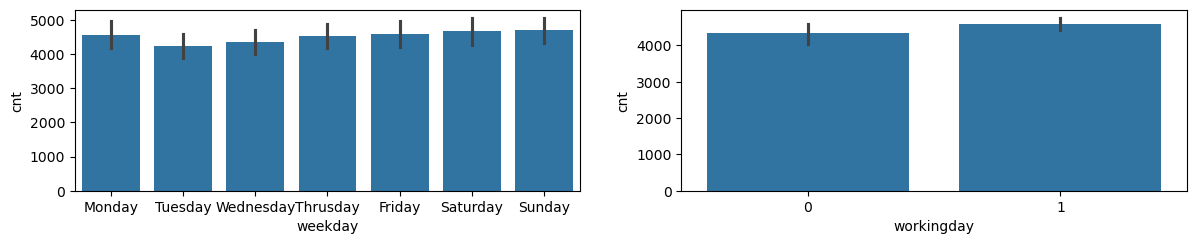

In [27]:
#Let's take working day, weak day and see the comparision.
plt.figure(figsize=(30, 8))
plt.subplot(2,4,1)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_bike)
plt.show()
plt.figure(figsize=(30, 8))
plt.subplot(3,4,1)
sns.barplot(x = 'weekday', y = 'cnt', data = df_bike)
plt.subplot(3,4,2)
sns.barplot(x = 'workingday', y = 'cnt', data = df_bike)
plt.show()

#### Friday, saturday and sunday has slighty more number of bookings compared to other days

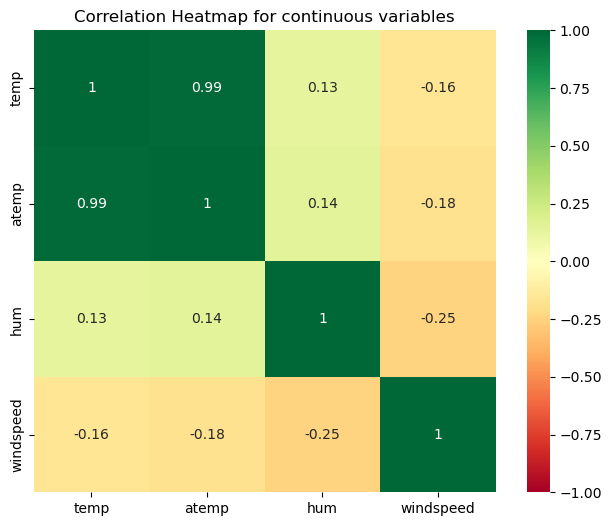

In [29]:
### Now let's see the coorelation between numerical continuous variables (['temp', 'atemp','hum', 'windspeed'])
correlation_matrix = df_bike[['temp', 'atemp', 'hum', 'windspeed']].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax=1, square=True)
plt.title('Correlation Heatmap for continuous variables')
plt.show()

<Figure size 1500x3000 with 0 Axes>

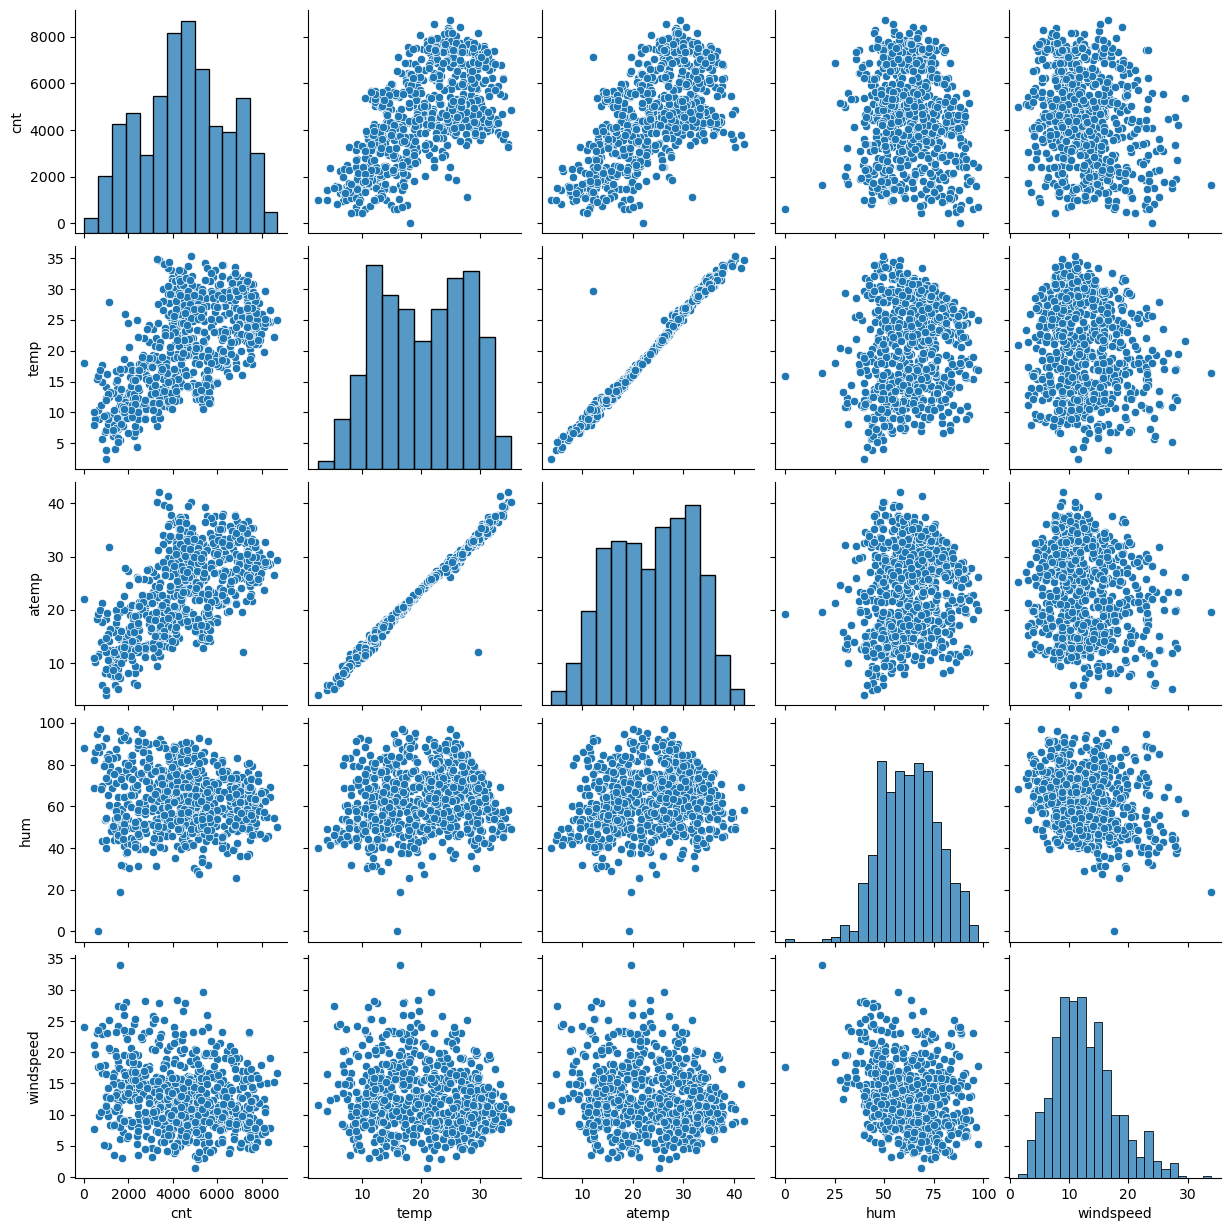

In [30]:
#We can draw pairplots for these continuous variables to represent them graphically:
plt.figure(figsize = (15,30))
sns.pairplot(data=df_bike,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### As correlation between atemp and temp is almost 1 and graphically it's a straight line, we can exclude one of them as we can't use both. Let's exclude one of them based on the p-value and VIF as we go further.

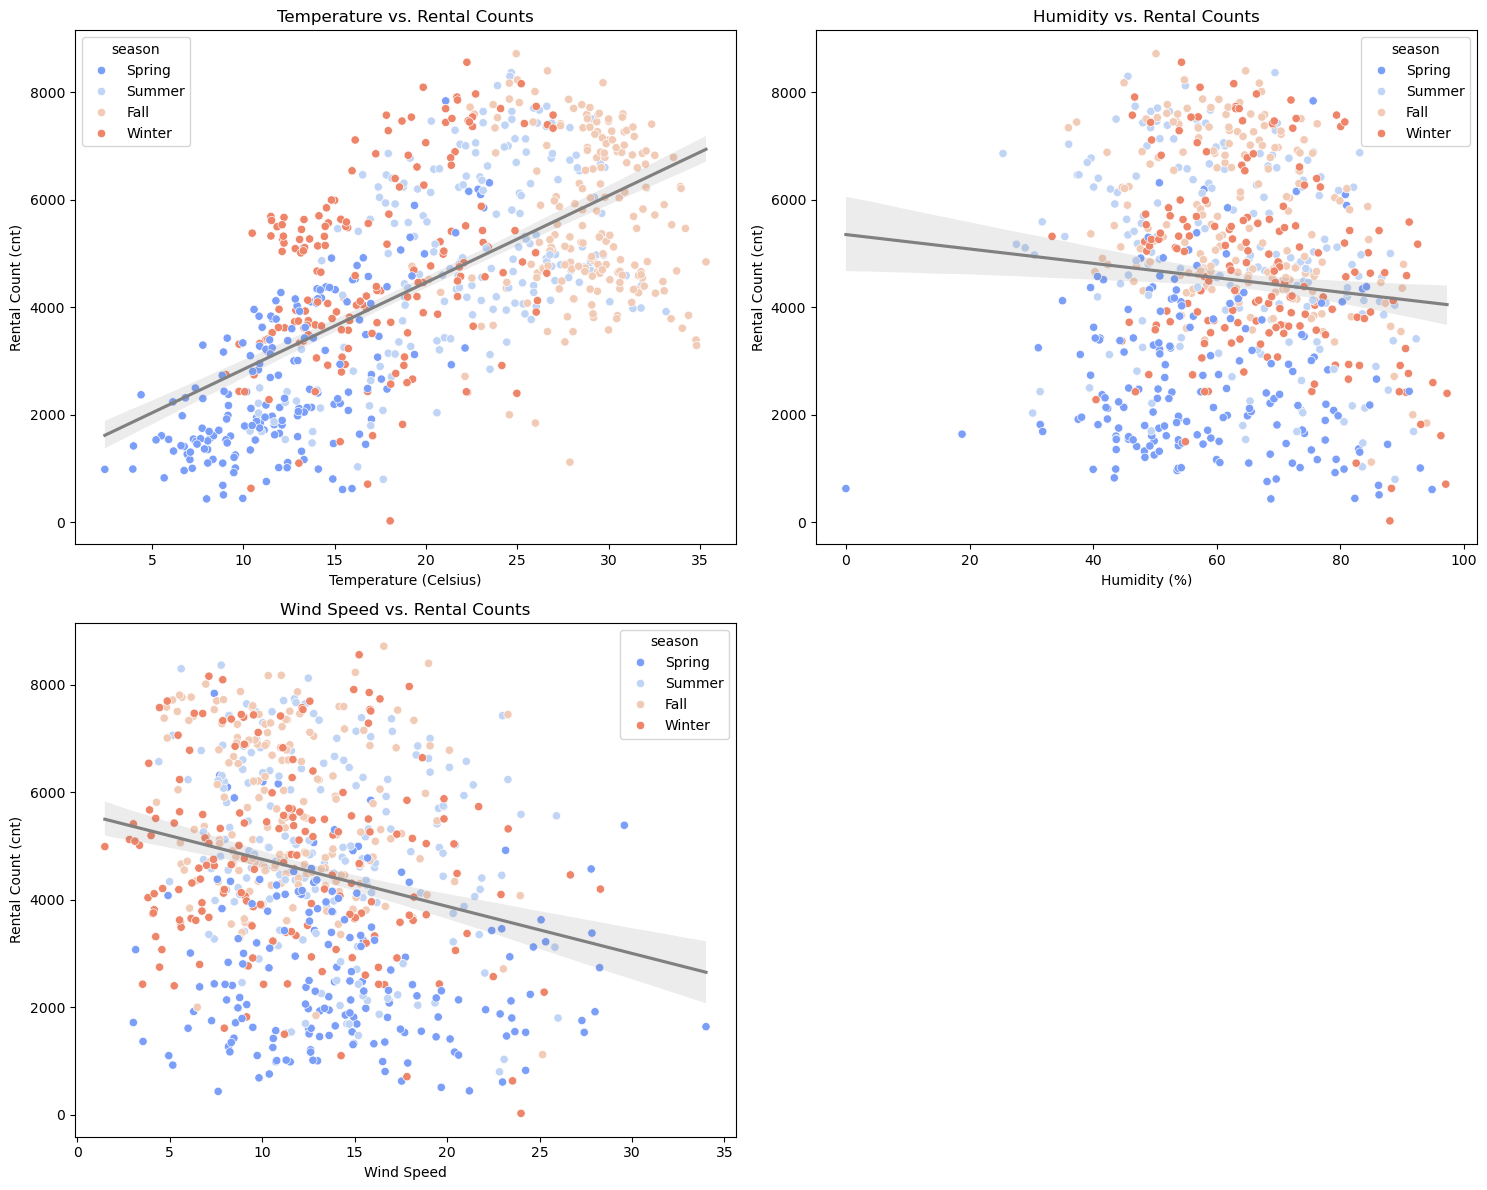

In [32]:
#If we want to visualise different variables in scatter plot
plt.figure(figsize=(15, 12))

# Scatter Plot: temp vs cnt
plt.subplot(2, 2, 1)
sns.scatterplot(data=df_bike, x='temp', y='cnt', hue='season', palette='coolwarm')
sns.regplot(data=df_bike, x='temp', y='cnt', scatter=False, color='grey')  # trendline
plt.title('Temperature vs. Rental Counts')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Rental Count (cnt)')

# Scatter Plot: hum vs cnt
plt.subplot(2, 2, 2)
sns.scatterplot(data=df_bike, x='hum', y='cnt', hue='season', palette='coolwarm')
sns.regplot(data=df_bike, x='hum', y='cnt', scatter=False, color='grey')
plt.title('Humidity vs. Rental Counts')
plt.xlabel('Humidity (%)')
plt.ylabel('Rental Count (cnt)')

# Scatter Plot: windspeed vs cnt
plt.subplot(2, 2, 3)
sns.scatterplot(data=df_bike, x='windspeed', y='cnt', hue='season', palette='coolwarm')
sns.regplot(data=df_bike, x='windspeed', y='cnt', scatter=False, color='grey')
plt.title('Wind Speed vs. Rental Counts')
plt.xlabel('Wind Speed')
plt.ylabel('Rental Count (cnt)')

plt.tight_layout()
plt.show()


# 3. Data Preparation

### 3.1 Encoding Data

In [35]:
df_month=pd.get_dummies(df_bike.mnth,drop_first=True).astype(int)
df_weekday=pd.get_dummies(df_bike.weekday,drop_first=True).astype(int)
df_weatherSit=pd.get_dummies(df_bike.weathersit,drop_first=True).astype(int)
df_seasons=pd.get_dummies(df_bike.season,drop_first=True).astype(int)

In [36]:
df_month.head()

,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [37]:
df_seasons.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [38]:
df_weatherSit.head()

,Light Snow with Rain,Misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [39]:
df_weekday.head()

,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [40]:
df_bike_new = pd.concat([df_bike, df_month, df_seasons, df_weatherSit, df_weekday],axis=1)
df_bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Summer,Winter,Light Snow with Rain,Misty,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
0,Spring,0,jan,0,Monday,0,Misty,14.110847,18.18125,80.5833,...,0,0,0,1,1,0,0,0,0,0
1,Spring,0,jan,0,Tuesday,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,0,0,1,0
2,Spring,0,jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,1
3,Spring,0,jan,0,Thrusday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,Spring,0,jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df_bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   season                730 non-null    object 
 1   yr                    730 non-null    int64  
 2   mnth                  730 non-null    object 
 3   holiday               730 non-null    int64  
 4   weekday               730 non-null    object 
 5   workingday            730 non-null    int64  
 6   weathersit            730 non-null    object 
 7   temp                  730 non-null    float64
 8   atemp                 730 non-null    float64
 9   hum                   730 non-null    float64
 10  windspeed             730 non-null    float64
 11  cnt                   730 non-null    int64  
 12  aug                   730 non-null    int32  
 13  dec                   730 non-null    int32  
 14  feb                   730 non-null    int32  
 15  jan                   7

In [42]:
df_bike_new.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,Summer,Winter,Light Snow with Rain,Misty,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.084932,0.084932,...,0.252055,0.243836,0.028767,0.336986,0.143836,0.142466,0.142466,0.142466,0.143836,0.143836
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.278971,0.278971,...,0.434490,0.429689,0.167266,0.473004,0.351164,0.349767,0.349767,0.349767,0.351164,0.351164
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
#As we created dummy columns let's delete the corresponding categorical columns.
df_bike_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [44]:
df_bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,Summer,Winter,Light Snow with Rain,Misty,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,1,1,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3.2 Seperation of data into training and testing sets.

In [46]:
df_train, df_test = train_test_split(df_bike_new, train_size = 0.7, random_state = 100)

In [47]:
df_train.shape

(510, 30)

In [48]:
#So test will have 220 rows.
#As we saw into the head(), many variables have values varying in different ranges of 0-10, 10-20,... So to make them all one standard range let's use a scaler
scaler = MinMaxScaler()
numerical_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[numerical_vars] = scaler.fit_transform(df_train[numerical_vars])

In [49]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,Summer,Winter,Light Snow with Rain,Misty,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,1,1,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,1,1,0,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,1,0,0,1,0,0,1,0,0,0


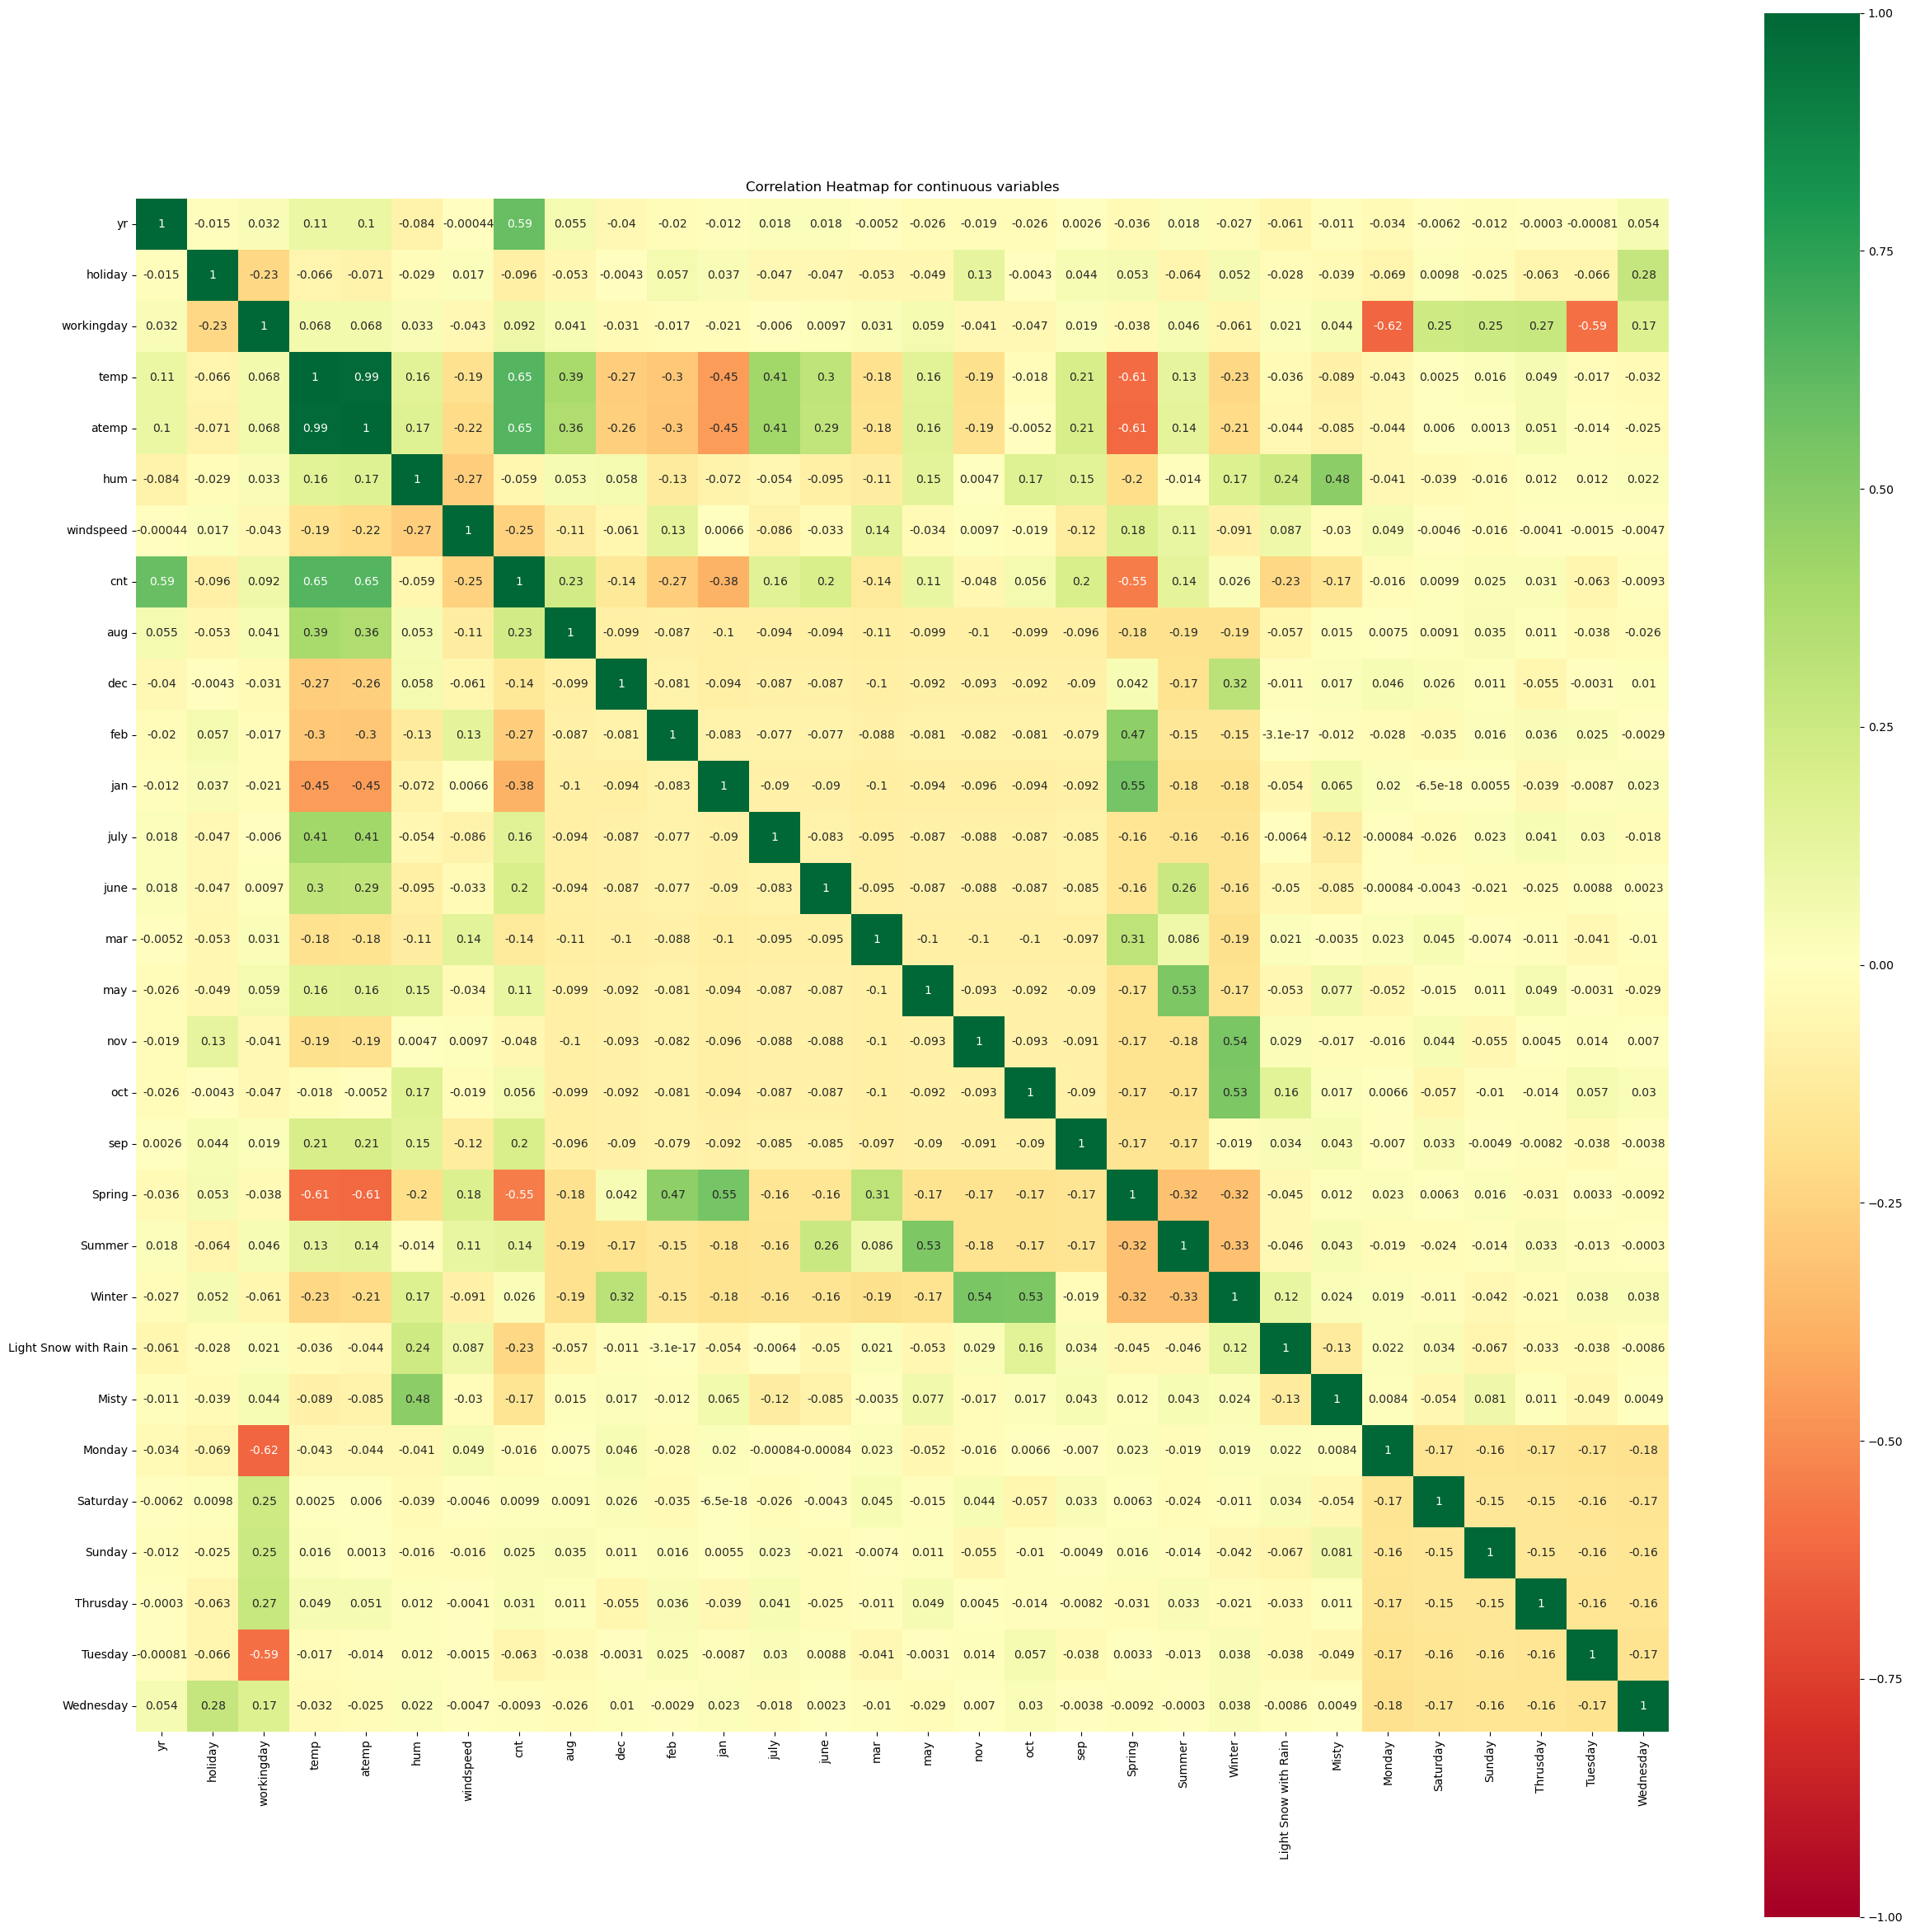

In [50]:
#Now as all are numerical variables let's check the correlation between them
plt.figure(figsize=(30, 30))
sns.heatmap(df_train.corr(), annot=True, cmap='RdYlGn', vmin=-1, vmax=1, square=True)
plt.title('Correlation Heatmap for continuous variables')
plt.show()

### As we have observed before temp and atemp are highly correlated. cnt is highly correlated with yr, temp and atemp. 

## 4. Building Linear Model

In [53]:
#For training dividing x and y considering cnt as target.
y_train = df_train.pop('cnt')
X_train = df_train

#### Recursive Feature Elimination (RFE) is a feature selection technique used to identify the most important features for predictive modeling.

### 4.1 Let's take 7 variables for RFE first

In [56]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=7)
rfe = rfe.fit(X_train, y_train)

In [57]:
#List of variables selected in top 7 list
#All these 7 will be having rank 1
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 2),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('atemp', False, 18),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 23),
 ('dec', False, 16),
 ('feb', False, 15),
 ('jan', False, 11),
 ('july', True, 1),
 ('june', False, 19),
 ('mar', False, 13),
 ('may', False, 12),
 ('nov', False, 21),
 ('oct', False, 10),
 ('sep', False, 4),
 ('Spring', True, 1),
 ('Summer', False, 9),
 ('Winter', False, 8),
 ('Light Snow with Rain', True, 1),
 ('Misty', False, 3),
 ('Monday', False, 5),
 ('Saturday', False, 22),
 ('Sunday', False, 14),
 ('Thrusday', False, 17),
 ('Tuesday', False, 7),
 ('Wednesday', False, 20)]

In [58]:
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'temp', 'hum', 'windspeed', 'july', 'Spring',
       'Light Snow with Rain'],
      dtype='object')


In [59]:
# MODEL 1
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm_1 = sm.OLS(y_train,X_train_rfe).fit() 
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     313.4
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.12e-178
Time:                        10:44:11   Log-Likelihood:                 467.49
No. Observations:                 510   AIC:                            -919.0
Df Residuals:                     502   BIC:                            -885.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4258      0.030     14.306      0.000       0.367       0.484
yr                       0.2298      0.009     26.263      0.000       0.213       0.247
temp                     0.4491      0.027     16.797      0.000       0.397       0.502
hum                     -0.2399      0.033     -7.297      0.000      -0.304      -0.175
windspeed               -0.2057      0.027     -7.576      0.000      -0.259      -0.152
july                    -0.0901      0.018     -4.957      0.000      -0.126      -0.054
Spring                  -0.1481      0.013    -11.474      0.000      -0.173      -0.123
Light Snow with Rain    -0.1868      0.027     -6.954      0.000      -0.240      -0.134
==============================================================================
Omnibus:                       46.634   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.623
Skew:                          -0.555   Prob(JB):                     3.46e-20
Kurtosis:                       4.728   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# Method to calculate VIF
def calculate_vif(dataf):
    vif_data = pd.DataFrame()
    vif_data["feature"] = dataf.columns
    vif_data["VIF"] = [variance_inflation_factor(dataf.values, i) for i in range(dataf.shape[1])]
    return vif_data

In [61]:
# Now let's calculate VIF for these 7 columns
calculate_vif(X_train_rfe)

,feature,VIF
0,const,47.508174
1,yr,1.026265
2,temp,1.951937
3,hum,1.229960
4,windspeed,1.137533
5,july,1.251327
6,Spring,1.643820
7,Light Snow with Rain,1.104706


In [62]:
#Let's drop const
X_train_rfe = X_train_rfe.drop(["const"], axis = 1)
calculate_vif(X_train_rfe).sort_values(by = "VIF", ascending = False)

,feature,VIF
2,hum,10.476976
1,temp,10.381628
3,windspeed,3.891116
0,yr,2.032693
5,Spring,1.800316
4,july,1.352844
6,Light Snow with Rain,1.106783


In [63]:
#Let's drop hum as it is having highest VIF value.
X_train_rfe1 = X_train_rfe.drop(["hum"], axis = 1)

In [64]:
# Model 2
X_train_rfe1 = sm.add_constant(X_train_rfe1)
lm_2 = sm.OLS(y_train,X_train_rfe1).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     323.1
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          5.46e-169
Time:                        10:44:11   Log-Likelihood:                 441.78
No. Observations:                 510   AIC:                            -869.6
Df Residuals:                     503   BIC:                            -839.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2586      0.020     12.961      0.000       0.219       0.298
yr                       0.2356      0.009     25.733      0.000       0.218       0.254
temp                     0.4293      0.028     15.362      0.000       0.374       0.484
windspeed               -0.1518      0.027     -5.530      0.000      -0.206      -0.098
july                    -0.0716      0.019     -3.784      0.000      -0.109      -0.034
Spring                  -0.1406      0.014    -10.404      0.000      -0.167      -0.114
Light Snow with Rain    -0.2411      0.027     -8.888      0.000      -0.294      -0.188
==============================================================================
Omnibus:                       55.914   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.169
Skew:                          -0.666   Prob(JB):                     3.96e-23
Kurtosis:                       4.755   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
#Now let's calculate VIF again
X_train_rfe1 = X_train_rfe1.drop(["const"], axis = 1)
calculate_vif(X_train_rfe1).sort_values(by = "VIF", ascending = False)

,feature,VIF
1,temp,3.948319
2,windspeed,3.721386
0,yr,2.027600
4,Spring,1.494153
3,july,1.256475
5,Light Snow with Rain,1.044820


### VIF values seems to be good and R-squared value is around 0.79. Let's try with more number of variables for RFE.

### 4.2 Let's take 15 variables for RFE now

In [68]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [69]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 15),
 ('dec', False, 8),
 ('feb', False, 7),
 ('jan', False, 3),
 ('july', True, 1),
 ('june', False, 11),
 ('mar', False, 5),
 ('may', False, 4),
 ('nov', False, 13),
 ('oct', False, 2),
 ('sep', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Light Snow with Rain', True, 1),
 ('Misty', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 14),
 ('Sunday', False, 6),
 ('Thrusday', False, 9),
 ('Tuesday', True, 1),
 ('Wednesday', False, 12)]

In [70]:
new_col = X_train.columns[rfe.support_]
print(new_col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'july',
       'sep', 'Spring', 'Summer', 'Winter', 'Light Snow with Rain', 'Misty',
       'Monday', 'Tuesday'],
      dtype='object')


In [71]:
#Model 3
X_train_rfe = X_train[new_col]
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm_3 = sm.OLS(y_train,X_train_rfe).fit() 
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          2.11e-191
Time:                        10:44:11   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1995      0.028      7.200      0.000       0.145       0.254
yr                       0.2298      0.008     28.647      0.000       0.214       0.246
holiday                 -0.0184      0.021     -0.867      0.386      -0.060       0.023
workingday               0.0837      0.010      8.665      0.000       0.065       0.103
temp                     0.5277      0.033     15.884      0.000       0.462       0.593
hum                     -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed               -0.1809      0.025     -7.118      0.000      -0.231      -0.131
july                    -0.0546      0.018     -3.019      0.003      -0.090      -0.019
sep                      0.0820      0.017      4.966      0.000       0.050       0.114
Spring                  -0.0555      0.021     -2.698      0.007      -0.096      -0.015
Summer                   0.0537      0.015      3.631      0.000       0.025       0.083
Winter                   0.0992      0.017      5.815      0.000       0.066       0.133
Light Snow with Rain    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Misty                   -0.0563      0.010     -5.425      0.000      -0.077      -0.036
Monday                   0.0937      0.012      8.040      0.000       0.071       0.117
Tuesday                  0.0406      0.012      3.315      0.001       0.017       0.065
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     1.08e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.3e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### We can eliminate holiday based upon p value as it is too high. P value is suggested to be less than 0.05

In [73]:
X_train_rfe = X_train_rfe.drop(["holiday"], axis = 1)

In [74]:
#Now let's calculate VIF again
X_train_rfe = X_train_rfe.drop(["const"], axis = 1)
calculate_vif(X_train_rfe).sort_values(by = "VIF", ascending = False)

,feature,VIF
3,hum,32.104544
2,temp,18.988963
1,workingday,18.410410
12,Monday,4.908499
4,windspeed,4.905201
7,Spring,4.799573
13,Tuesday,4.762488
9,Winter,3.691681
8,Summer,3.040142
11,Misty,2.309503


In [75]:
#Let's drop hum column due to multicollinearity as high vif value
X_train_rfe1 = X_train_rfe.drop(["hum"], axis = 1)

In [76]:
#Model 4
X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Running the linear model
lm_4 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.28e-188
Time:                        10:44:12   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1008      0.038      2.624      0.009       0.025       0.176
yr                       0.2337      0.008     28.828      0.000       0.218       0.250
workingday               0.1029      0.026      3.983      0.000       0.052       0.154
temp                     0.4915      0.033     15.027      0.000       0.427       0.556
windspeed               -0.1491      0.025     -6.024      0.000      -0.198      -0.100
july                    -0.0496      0.018     -2.702      0.007      -0.086      -0.014
sep                      0.0759      0.017      4.537      0.000       0.043       0.109
Spring                  -0.0655      0.021     -3.147      0.002      -0.106      -0.025
Summer                   0.0477      0.015      3.180      0.002       0.018       0.077
Winter                   0.0846      0.017      4.971      0.000       0.051       0.118
Light Snow with Rain    -0.2895      0.024    -11.880      0.000      -0.337      -0.242
Misty                   -0.0822      0.009     -9.514      0.000      -0.099      -0.065
Monday                   0.1146      0.027      4.201      0.000       0.061       0.168
Tuesday                  0.0567      0.027      2.069      0.039       0.003       0.111
==============================================================================
Omnibus:                       66.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.148
Skew:                          -0.682   Prob(JB):                     6.17e-36
Kurtosis:                       5.402   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
#Now let's calculate VIF again
X_train_rfe1 = X_train_rfe1.drop(["const"], axis = 1)
calculate_vif(X_train_rfe1).sort_values(by = "VIF", ascending = False)

,feature,VIF
1,workingday,16.191659
2,temp,12.735052
3,windspeed,4.756959
11,Monday,4.450974
12,Tuesday,4.209790
6,Spring,3.821368
8,Winter,2.781660
7,Summer,2.764492
0,yr,2.072751
4,july,1.596613


In [78]:
X_train_rfe2 = X_train_rfe1.drop(["workingday"], axis = 1)

In [79]:
# Model 5
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Running the linear model
lm_5 = sm.OLS(y_train,X_train_rfe2).fit() 
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          2.06e-186
Time:                        10:44:12   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2003      0.030      6.760      0.000       0.142       0.259
yr                       0.2342      0.008     28.467      0.000       0.218       0.250
temp                     0.4928      0.033     14.847      0.000       0.428       0.558
windspeed               -0.1513      0.025     -6.025      0.000      -0.201      -0.102
july                    -0.0488      0.019     -2.618      0.009      -0.085      -0.012
sep                      0.0723      0.017      4.264      0.000       0.039       0.106
Spring                  -0.0681      0.021     -3.225      0.001      -0.110      -0.027
Summer                   0.0481      0.015      3.159      0.002       0.018       0.078
Winter                   0.0816      0.017      4.731      0.000       0.048       0.116
Light Snow with Rain    -0.2848      0.025    -11.530      0.000      -0.333      -0.236
Misty                   -0.0802      0.009     -9.170      0.000      -0.097      -0.063
Monday                   0.0157      0.011      1.370      0.171      -0.007       0.038
Tuesday                 -0.0421      0.012     -3.548      0.000      -0.065      -0.019
==============================================================================
Omnibus:                       80.355   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.836
Skew:                          -0.790   Prob(JB):                     7.39e-46
Kurtosis:                       5.699   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
#Let's drop column monday due to high p value.
X_train_rfe3 = X_train_rfe2.drop(["Monday"], axis = 1)

In [81]:
X_train_rfe3 = X_train_rfe3.drop(["const"], axis = 1)
calculate_vif(X_train_rfe3).sort_values(by = "VIF", ascending = False)

,feature,VIF
1,temp,5.135413
2,windspeed,4.598947
6,Summer,2.234967
5,Spring,2.089209
0,yr,2.066750
7,Winter,1.796397
3,july,1.586609
9,Misty,1.551239
4,sep,1.332037
10,Tuesday,1.174590


In [82]:
#Dropping temp column as it is having vif higher than 5
X_train_rfe_new = X_train_rfe3.drop(["temp"], axis = 1)

In [83]:
#Model 6
X_train_rfe_new = sm.add_constant(X_train_rfe_new)

# Running the linear model
lm_6 = sm.OLS(y_train,X_train_rfe_new).fit() 
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.8
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          4.80e-149
Time:                        10:44:12   Log-Likelihood:                 406.20
No. Observations:                 510   AIC:                            -790.4
Df Residuals:                     499   BIC:                            -743.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5883      0.017     34.789      0.000       0.555       0.621
yr                       0.2475      0.010     25.243      0.000       0.228       0.267
windspeed               -0.1724      0.030     -5.739      0.000      -0.231      -0.113
july                    -0.0088      0.022     -0.396      0.692      -0.052       0.035
sep                      0.0681      0.020      3.345      0.001       0.028       0.108
Spring                  -0.3020      0.017    -17.931      0.000      -0.335      -0.269
Summer                  -0.0437      0.017     -2.617      0.009      -0.076      -0.011
Winter                  -0.0796      0.016     -4.958      0.000      -0.111      -0.048
Light Snow with Rain    -0.2963      0.030    -10.000      0.000      -0.354      -0.238
Misty                   -0.0895      0.010     -8.546      0.000      -0.110      -0.069
Tuesday                 -0.0452      0.014     -3.229      0.001      -0.073      -0.018
==============================================================================
Omnibus:                       36.933   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.312
Skew:                          -0.376   Prob(JB):                     1.10e-19
Kurtosis:                       4.882   Cond. No.                         9.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
# We can't drop temp as it affected r squared value very much and before also we saw it has a good correlation with cnt.
# So let's go back to X_train_rfe3 training set after removing monday.
# Model 7
X_train_rfe3 = sm.add_constant(X_train_rfe3)

# Running the linear model
lm_7 = sm.OLS(y_train,X_train_rfe3).fit() 
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          3.37e-187
Time:                        10:44:12   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2034      0.030      6.877      0.000       0.145       0.261
yr                       0.2339      0.008     28.414      0.000       0.218       0.250
temp                     0.4917      0.033     14.805      0.000       0.426       0.557
windspeed               -0.1497      0.025     -5.963      0.000      -0.199      -0.100
july                    -0.0483      0.019     -2.587      0.010      -0.085      -0.012
sep                      0.0723      0.017      4.260      0.000       0.039       0.106
Spring                  -0.0682      0.021     -3.227      0.001      -0.110      -0.027
Summer                   0.0479      0.015      3.145      0.002       0.018       0.078
Winter                   0.0818      0.017      4.739      0.000       0.048       0.116
Light Snow with Rain    -0.2847      0.025    -11.513      0.000      -0.333      -0.236
Misty                   -0.0802      0.009     -9.161      0.000      -0.097      -0.063
Tuesday                 -0.0450      0.012     -3.847      0.000      -0.068      -0.022
==============================================================================
Omnibus:                       75.768   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.623
Skew:                          -0.732   Prob(JB):                     3.69e-45
Kurtosis:                       5.736   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
X_train_rfe3 = X_train_rfe3.drop(["const"], axis = 1)
calculate_vif(X_train_rfe3).sort_values(by = "VIF", ascending = False)

,feature,VIF
1,temp,5.135413
2,windspeed,4.598947
6,Summer,2.234967
5,Spring,2.089209
0,yr,2.066750
7,Winter,1.796397
3,july,1.586609
9,Misty,1.551239
4,sep,1.332037
10,Tuesday,1.174590


In [86]:
train_r2 = lm_7.rsquared
train_adj_r2 = lm_7.rsquared_adj

print(f'R2 Score of Training set: {train_r2}')
print(f'Adjusted R2 Score of Training set: {train_adj_r2}')

R2 Score of Training set: 0.8355513232579529
Adjusted R2 Score of Training set: 0.8319189227676667


## 5. Residual Analysis

In [88]:
X_train_rfe3

,yr,temp,windspeed,july,sep,Spring,Summer,Winter,Light Snow with Rain,Misty,Tuesday
576,1,0.815169,0.264686,1,0,0,0,0,0,0,0
426,1,0.442393,0.255342,0,0,1,0,0,0,1,0
728,1,0.245101,0.663106,0,0,1,0,0,0,0,1
482,1,0.395666,0.188475,0,0,0,1,0,0,1,0
111,0,0.345824,0.380981,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1,0.863973,0.187140,0,0,0,0,0,0,0,0
53,0,0.202618,0.111379,0,0,1,0,0,0,0,0
350,0,0.248216,0.431816,0,0,0,0,1,0,1,0
79,0,0.462664,0.529881,0,0,0,1,0,0,1,0


In [89]:
X_train_rfe3 = sm.add_constant(X_train_rfe3)

In [90]:
Y_train_pred = lm_7.predict(X_train_rfe3)

Text(0.5, 0, 'Errors')

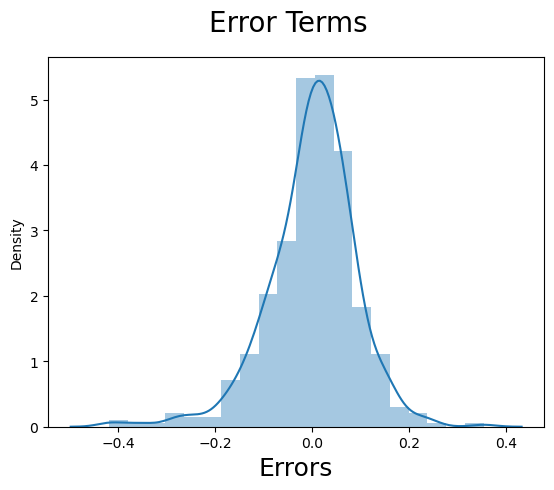

In [91]:
# Histogram for error terms.

fig = plt.figure()
sns.distplot((y_train - Y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

#### Here residuals are distributed around mean 0. So residual distribution is following normal distribution.

## 6. Predictions using final model

In [94]:
numerical_vars = ['temp','atemp','hum','windspeed','cnt']

df_test[numerical_vars] = scaler.transform(df_test[numerical_vars])

In [95]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,Summer,Winter,Light Snow with Rain,Misty,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.263636,0.236364,0.027273,0.318182,0.118182,0.163636,0.177273,0.168182,0.145455,0.127273
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.441609,0.425817,0.163248,0.466833,0.323559,0.370789,0.382770,0.374881,0.353363,0.334038
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
y_test = df_test.pop('cnt')
X_test = df_test

In [97]:
X_train_rfe3.drop('const',axis=1,inplace=True)
X_test_new = X_test[X_train_rfe3.columns]
X_test_new = sm.add_constant(X_test_new)

In [98]:
# Prediction making
y_pred = lm_7.predict(X_test_new)

## 7. Model Evaluation

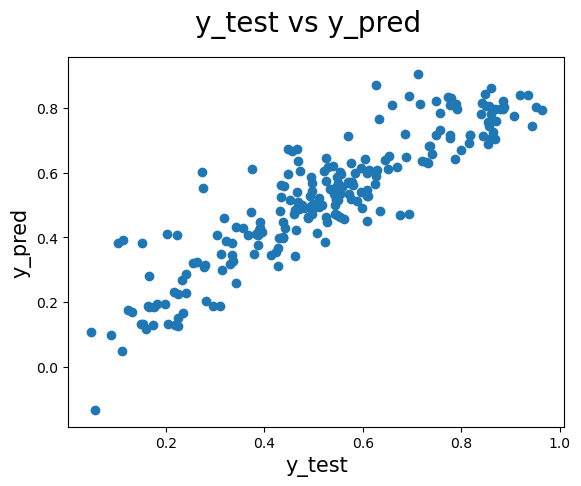

In [100]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)            
plt.xlabel('y_test', fontsize=15)                        
plt.ylabel('y_pred', fontsize=15)                         
plt.show()

In [101]:
#R2 score of test
r2 = r2_score(y_test, y_pred)
r2

0.8057616301094372

In [102]:
#Adjusted r squared value for test data.
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
adjusted_r2

0.7761

In [103]:
round(lm_7.params,4)

const                   0.2034
yr                      0.2339
temp                    0.4917
windspeed              -0.1497
july                   -0.0483
sep                     0.0723
Spring                 -0.0682
Summer                  0.0479
Winter                  0.0818
Light Snow with Rain   -0.2847
Misty                  -0.0802
Tuesday                -0.0450
dtype: float64

#### cnt = 0.2034 + 0.2339 x yr + 0.4917 x temp - 0.1497 x windspeed - 0.0483 x july + 0.0723 x sep - 0.0682 x Spring + 0.0479 x Summer + 0.0818 x Winter - 0.2847 x (Light Snow With Rain) - 0.0802 x Misty - 0.0450 x Tuesday

### Demand of bike rental mainly depends on factors like:
1) Year
2) Temperature
3) Season (Spring, Summer, Winter)
4) Months (July, September)
5) Climate (Misty, Light snow with Rain)
6) Weekday (Tuesday)

### R2 values
1) R2 for training dataset: 0.835
2) Adjusted R2 for training dataset: 0.832
3) R2 for Testing dataset: 0.80
4) Adjusted R2 for training dataset: 0.77